In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
file = pd.read_csv('weatherAUS.csv')
file

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,False
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,False
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,False
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,False
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,False,False
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,False,False
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,False,False
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False


In [3]:
def alda_regression_linear(X_train, X_test, y_train):

    # Perform linear regression
    # Inputs:
    # X_train: trainning data frame (19 variables, x1-x19)
    # X_test: test data frame(19 variables, x1-x19)
    # y_train: dependent variable, training data (vector, continous type)
  
    # allowed packages: sklearn.linear_model
  
    # Function hints: Read the documentation for the functions LinearRegression (link above)
    
    # write code for building a linear regression model using X_train, y_train
    # YOUR CODE HERE
    a = []
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    a.append(reg)
    a.append(reg.predict(X_test))
    return a

In [4]:
def alda_regression_lasso(X_train, X_test, y_train, random_state=0):
    # Perform lasso regression
    # Inputs:
    # X_train: training data frame(19 variables, x1-x19)
    # X_test: test data frame(19 variables, x1-x19)
    # y_train: dependent variable, training data (vector, continous type)
    # random_state: a random state to use in CV model training
    # General Information:
        # use 10-fold cross validation to determine the best model hyperparameters
    
    # Output:
    # A tuple containing:
    # - The regression model and 
    # - The list of predictions on test data (X_test) (vector) 
  
    # allowed packages: sklearn.linear_model
  
    # Function hints: Read the documentation for the functions LassoCV (link above)
    
    # write code for lasso regression here
    # 10 fold cross validation
    # set up the random_state as 0 in order for reproducibility
    # YOUR CODE HERE
    a = []
    reg = LassoCV(cv = 10, random_state = 0)
    reg.fit(X_train, y_train)
    a.append(reg)
    a.append(reg.predict(X_test))
    return a

In [5]:
def evaluation_measures(y_true, y_pred):
    """
    Write a single function to calculate accuracy and a confusion matrix for the given data
    Input:
        y_true: A numpy array containing the actual ground truth labels
        y_pred: A numpy array containing the predicted labels from a model (such as a decision tree or knn classifier)
                y_pred has the same dimensions as y_true
                
    Output:
        A list in the following order:
        overall accuracy score, confusion matrix
    
    Allowed Libraries: sklearn.metrics.confusion_matrix and np methods *only* (no other sklearn metrics)
    
    Hint: Take a look at confusion_matrix method from sklearn.metrics
    """
    # YOUR CODE HERE
    array = confusion_matrix(y_true, y_pred)
    accuracy = 0
    for i in range(0, y_true.size):
        if y_true[i] != y_pred[i]:
            accuracy = accuracy + 1
    accuracy = (y_true.size-accuracy) / y_true.size
    a=[]
    a.append(accuracy)
    a.append(array)
    return a

In [6]:
uluru = file.loc[file['Location'] == 'Uluru' ]
brisbane = file.loc[file['Location'] == 'Brisbane' ]
norfolkIsland = file.loc[file['Location'] == 'NorfolkIsland' ]

In [7]:
uluru

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
143882,3/1/2013,Uluru,19.7,30.0,0.8,NaN,NaN,ESE,48.0,E,...,76.0,54.0,1010.6,1007.5,NaN,NaN,21.7,28.4,False,False
143883,3/2/2013,Uluru,21.6,33.1,0.0,NaN,NaN,E,33.0,E,...,44.0,33.0,1010.5,1006.5,NaN,NaN,24.6,31.3,False,False
143884,3/3/2013,Uluru,21.3,36.1,0.0,NaN,NaN,E,33.0,ENE,...,39.0,27.0,1006.9,1002.7,NaN,NaN,27.6,34.5,False,False
143885,3/4/2013,Uluru,22.9,37.7,0.0,NaN,NaN,ENE,39.0,E,...,35.0,22.0,1006.0,1002.1,NaN,NaN,28.7,35.4,False,False
143886,3/5/2013,Uluru,24.0,39.0,0.0,NaN,NaN,S,39.0,E,...,33.0,21.0,1006.9,1003.5,NaN,NaN,29.9,37.3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,False,False
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,False,False
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,False,False
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False


In [8]:
uluru_total_number = uluru.shape[0]
brisbane_total_number = brisbane.shape[0]
norfolkIsland_total_number = norfolkIsland.shape[0]

print("Uluru: ", uluru_total_number, " samples")
print("Brisbane: ", brisbane_total_number, " samples")
print("Norfolk Island: ", norfolkIsland_total_number, " samples")

Uluru:  1578  samples
Brisbane:  3193  samples
Norfolk Island:  3009  samples


In [9]:
uluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 143882 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1578 non-null   object 
 1   Location       1578 non-null   object 
 2   MinTemp        1543 non-null   float64
 3   MaxTemp        1571 non-null   float64
 4   Rainfall       1522 non-null   float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    1524 non-null   object 
 8   WindGustSpeed  1524 non-null   float64
 9   WindDir9am     1512 non-null   object 
 10  WindDir3pm     1545 non-null   object 
 11  WindSpeed9am   1542 non-null   float64
 12  WindSpeed3pm   1548 non-null   float64
 13  Humidity9am    1563 non-null   float64
 14  Humidity3pm    1574 non-null   float64
 15  Pressure9am    1568 non-null   float64
 16  Pressure3pm    1574 non-null   float64
 17  Cloud9am       348 non-null    float64
 18  C

In [10]:
brisbane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 84007 to 87199
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   MinTemp        3184 non-null   float64
 3   MaxTemp        3179 non-null   float64
 4   Rainfall       3161 non-null   float64
 5   Evaporation    3174 non-null   float64
 6   Sunshine       3144 non-null   float64
 7   WindGustDir    3152 non-null   object 
 8   WindGustSpeed  3152 non-null   float64
 9   WindDir9am     3123 non-null   object 
 10  WindDir3pm     3159 non-null   object 
 11  WindSpeed9am   3192 non-null   float64
 12  WindSpeed3pm   3185 non-null   float64
 13  Humidity9am    3189 non-null   float64
 14  Humidity3pm    3178 non-null   float64
 15  Pressure9am    3192 non-null   float64
 16  Pressure3pm    3185 non-null   float64
 17  Cloud9am       3192 non-null   float64
 18  Clo

In [11]:
norfolkIsland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 21119 to 24127
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3009 non-null   object 
 1   Location       3009 non-null   object 
 2   MinTemp        3008 non-null   float64
 3   MaxTemp        3008 non-null   float64
 4   Rainfall       2964 non-null   float64
 5   Evaporation    2775 non-null   float64
 6   Sunshine       2570 non-null   float64
 7   WindGustDir    2964 non-null   object 
 8   WindGustSpeed  2965 non-null   float64
 9   WindDir9am     2978 non-null   object 
 10  WindDir3pm     3004 non-null   object 
 11  WindSpeed9am   3001 non-null   float64
 12  WindSpeed3pm   3007 non-null   float64
 13  Humidity9am    3004 non-null   float64
 14  Humidity3pm    3007 non-null   float64
 15  Pressure9am    3001 non-null   float64
 16  Pressure3pm    3007 non-null   float64
 17  Cloud9am       2943 non-null   float64
 18  Clo

In [12]:
## Uluru has no data for evaporations and shunshine, therefore, we have to remove them
## We can not handle the direction of wind speed properly
file.drop(['Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am','WindDir3pm'], inplace = True, axis = 1)
# Drop all data that contains null values
file= file.dropna(axis=0,how="any")

In [13]:
## Get new values for all them
uluru = file.loc[file['Location'] == 'Uluru' ]
brisbane = file.loc[file['Location'] == 'Brisbane' ]
norfolkIsland = file.loc[file['Location'] == 'NorfolkIsland' ]
total = uluru.append(brisbane).append(norfolkIsland)

uluru_total_number = uluru.shape[0]
brisbane_total_number = brisbane.shape[0]
norfolkIsland_total_number = norfolkIsland.shape[0]

print("Uluru: ", uluru_total_number, " samples")
print("Brisbane: ", brisbane_total_number, " samples")
print("Norfolk Island: ", norfolkIsland_total_number, " samples")

uluru

Uluru:  239  samples
Brisbane:  3106  samples
Norfolk Island:  2808  samples


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
144333,5/26/2014,Uluru,15.8,23.3,5.6,43.0,9.0,24.0,98.0,55.0,1016.4,1013.8,6.0,2.0,16.3,22.5,True,False
144381,7/13/2014,Uluru,8.0,11.7,0.0,43.0,13.0,22.0,48.0,87.0,1025.1,1022.6,5.0,8.0,10.5,8.5,False,True
144382,7/14/2014,Uluru,7.0,16.1,1.6,24.0,11.0,7.0,94.0,64.0,1022.0,1017.8,8.0,8.0,7.9,14.3,True,False
144387,7/19/2014,Uluru,8.9,16.6,0.2,35.0,15.0,11.0,61.0,36.0,1024.9,1021.4,8.0,6.0,10.4,16.4,False,False
144390,7/22/2014,Uluru,7.5,28.0,0.0,41.0,6.0,26.0,51.0,24.0,1019.9,1014.6,5.0,8.0,14.2,25.8,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145428,5/25/2017,Uluru,14.6,26.3,0.0,37.0,19.0,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0,False,False
145429,5/26/2017,Uluru,14.3,27.6,0.4,39.0,0.0,20.0,68.0,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2,False,False
145432,5/29/2017,Uluru,12.7,22.2,0.0,37.0,19.0,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0,False,False
145433,5/30/2017,Uluru,9.4,22.7,0.0,35.0,13.0,17.0,62.0,32.0,1026.6,1023.6,8.0,4.0,11.8,22.3,False,False


In [14]:
## Random selecting training data and testing data, 30% of the data are used to train
arr = uluru.to_numpy()
np.random.shuffle(arr)
uluru_x_train = arr[0:uluru_total_number//3,2:-1]
uluru_test = arr[uluru_total_number//3:len(arr),2:-1]
uluru_y_train = arr[0:uluru_total_number//3,-1].reshape(uluru_total_number//3,1)

arr = brisbane.to_numpy()
np.random.shuffle(arr)
brisbane_x_train = arr[0:brisbane_total_number//3,2:-1]
brisbane_test = arr[brisbane_total_number//3:len(arr),2:-1]
brisbane_y_train = arr[0:brisbane_total_number//3,-1].reshape(brisbane_total_number//3,1)

arr = norfolkIsland.to_numpy()
np.random.shuffle(arr)
norfolk_x_train = arr[0:norfolkIsland_total_number//3,2:-1]
norfolk_test = arr[norfolkIsland_total_number//3:len(arr),2:-1]
norfolk_y_train = arr[0:norfolkIsland_total_number//3,-1].reshape(norfolkIsland_total_number//3,1)

In [15]:
uluru_lasso_model, uluru_lasso_regression_result = alda_regression_lasso(uluru_x_train, uluru_test, uluru_y_train)
print(f'Lasso Regression Model coefficients for Uluru:\n{uluru_lasso_model.coef_}')

brisbane_lasso_model, brisbane_lasso_regression_result = alda_regression_lasso(brisbane_x_train, brisbane_test, brisbane_y_train)
print(f'Lasso Regression Model coefficients for Brisbane:\n{brisbane_lasso_model.coef_}')

norfolk_lasso_model, norfolk_lasso_regression_result = alda_regression_lasso(norfolk_x_train, norfolk_test, norfolk_y_train)
print(f'Lasso Regression Model coefficients for Norfolk Island:\n{norfolk_lasso_model.coef_}')

/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Lasso Regression Model coefficients for Uluru:
[ 0.          0.          0.          0.00993968 -0.          0.
  0.00011185  0.01139397 -0.         -0.01289013  0.          0.
  0.          0.         -0.        ]


/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Lasso Regression Model coefficients for Brisbane:
[ 0.         -0.         -0.00046383  0.01148747 -0.00136841 -0.00698703
  0.00173206  0.01153151  0.00774806 -0.00893858  0.00178256  0.02185515
 -0.         -0.00544973  0.        ]


/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Lasso Regression Model coefficients for Norfolk Island:
[-0.         -0.         -0.00146007  0.01034765 -0.00663861 -0.00732596
 -0.00016603  0.01259075  0.07816459 -0.08909271  0.          0.00888943
 -0.         -0.00634833  0.03791137]


In [16]:
## Lasso eliminates too much componenets, therefore, we tried to do linear regression to select features
uluru_linear_model, uluru_linear_regression_result = alda_regression_linear(uluru_x_train, uluru_test, uluru_y_train)
print(f'Linear Regression Model coefficients for Uluru:\n{uluru_linear_model.coef_}')

brisbane_linear_model, brisbane_linear_regression_result = alda_regression_linear(brisbane_x_train, brisbane_test, brisbane_y_train)
print(f'Model coefficients for Brisbane:\n{brisbane_linear_model.coef_}')

norfolk_linear_model, norfolk_linear_regression_result = alda_regression_linear(norfolk_x_train, norfolk_test, norfolk_y_train)
print(f'Model coefficients for Norfolk Island:\n{norfolk_linear_model.coef_}')

Linear Regression Model coefficients for Uluru:
[[-1.86196002e-02 -6.96585983e-02  3.76661382e-03  1.19559560e-02
  -1.05579251e-04 -1.33371534e-03  3.97788362e-03  1.60448544e-02
   2.48487982e-02 -3.36850404e-02  5.67691478e-04  3.10814492e-02
   1.56059092e-02  9.26279110e-02 -2.57857683e-01]]
Model coefficients for Brisbane:
[[ 0.00597233  0.0094457  -0.00086714  0.01128095 -0.00172177 -0.00721382
   0.00109397  0.01048011  0.02185099 -0.02245351  0.00225253  0.02297521
  -0.0033058  -0.01745913  0.04743269]]
Model coefficients for Norfolk Island:
[[ 0.00121189  0.00355289 -0.00173339  0.01014849 -0.00656732 -0.00731367
  -0.0002975   0.01233568  0.08448364 -0.09541917 -0.00033125  0.00926789
   0.0006333  -0.0108421   0.05871361]]


In [17]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RainToday']
features_data = total.loc[:,features].values
actual_data = total.loc[:,['RainTomorrow']].values

uluru_features = uluru.loc[:,features].values
uluru_actual = uluru.loc[:,['RainTomorrow']].values

brisbane_features = brisbane.loc[:,features].values
brisbane_actual = brisbane.loc[:,['RainTomorrow']].values

norfolk_features = norfolkIsland.loc[:,features].values
norfolk_actual = norfolkIsland.loc[:,['RainTomorrow']].values
## Standardlize the data
features_data = StandardScaler().fit_transform(features_data)

In [18]:
pca = PCA(n_components = 15)
pc = pca.fit_transform(features_data)

eigenvalue = pca.explained_variance_ratio_
eigenvalue

array([0.27655035, 0.26517957, 0.14006949, 0.09279828, 0.0588836 ,
       0.04776816, 0.03450195, 0.02871754, 0.01888417, 0.01375524,
       0.01125561, 0.00703983, 0.00233541, 0.00122697, 0.00103383])

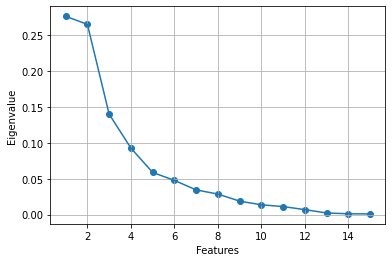

In [19]:
plt.scatter(range(1,16),eigenvalue)
plt.plot(range(1,16),eigenvalue)
plt.xlabel('Features')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
## From the plot that we know, the fourth feature has a variance lower than 10%. Therefore, we are going to select three features to make the prediction.
pca = PCA(n_components=3)
pc = pca.fit_transform(features_data)

In [21]:
uluru_fit = RFE(uluru_linear_model, 3).fit(uluru_features,uluru_actual)
print("Num Features: %s" % (uluru_fit.n_features_))
print("Selected Features: %s" % (uluru_fit.support_))
print("Feature Ranking: %s" % (uluru_fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False  True  True]
Feature Ranking: [ 6  2 10  8  9 12 13  4  3  1  7  5 11  1  1]


/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [22]:
brisbane_fit = RFE(brisbane_linear_model, 3).fit(brisbane_features,brisbane_actual)
print("Num Features: %s" % (brisbane_fit.n_features_))
print("Selected Features: %s" % (brisbane_fit.support_))
print("Feature Ranking: %s" % (brisbane_fit.ranking_))

/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Num Features: 3
Selected Features: [False False False False False False False  True False False False  True
 False False  True]
Feature Ranking: [ 7  9 13  5 10  4 12  1  3  2 11  1  6  8  1]


In [23]:
norfolk_fit = RFE(norfolk_linear_model, 3).fit(norfolk_features,norfolk_actual)
print("Num Features: %s" % (norfolk_fit.n_features_))
print("Selected Features: %s" % (norfolk_fit.support_))
print("Feature Ranking: %s" % (norfolk_fit.ranking_))

/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Num Features: 3
Selected Features: [False False False False False False False False  True  True False False
 False False  True]
Feature Ranking: [ 3  9 12  6  8  5 13  4  1  1 10  2 11  7  1]


In [24]:
#Therefore, from the feature ranking that we knew, three of the top features that affect the prediction the most are:
#Uluru: Pressure3pm, Temp3pm, and RainToday
#Brisbane: Humidity3pm, Cloud3pm, and RainToday
#Norfolk Island: Pressure9am, Pressure3pm, and RainToday
#Create new dataframe for these three attributes of different location
uluru_features_value=['Pressure3pm', 'Temp3pm', 'RainToday']
brisbane_features_value = ['Humidity3pm', 'Cloud3pm', 'RainToday']
norfolk_features_value = ['Pressure9am', 'Pressure3pm', 'RainToday']

uluru_features = uluru.loc[:,uluru_features_value].values
uluru_actual = uluru.loc[:,['RainTomorrow']].values

brisbane_features = brisbane.loc[:,brisbane_features_value].values
brisbane_actual = brisbane.loc[:,['RainTomorrow']].values

norfolk_features = norfolkIsland.loc[:,norfolk_features_value].values
norfolk_actual = norfolkIsland.loc[:,['RainTomorrow']].values

uluru_features=np.asarray(uluru_features,dtype=np.float64)
uluru_actual=np.asarray(uluru_actual,dtype=np.float64)

brisbane_features=np.asarray(uluru_features,dtype=np.float64)
brisbane_actual=np.asarray(uluru_actual,dtype=np.float64)

norfolk_features=np.asarray(uluru_features,dtype=np.float64)
norfolk_actual=np.asarray(uluru_actual,dtype=np.float64)

Accuracy of your model is 0.7721518987341772,
Confusion matrix is:
 [[55  4]
 [14  6]]


[Text(604.5, 951.3000000000001, 'X[2] <= 0.5\ngini = 0.369\nsamples = 160\nvalue = [121, 39]'),
 Text(372.0, 679.5, 'X[0] <= 0.328\ngini = 0.274\nsamples = 122\nvalue = [102, 20]'),
 Text(186.0, 407.70000000000005, 'X[1] <= 0.715\ngini = 0.452\nsamples = 29\nvalue = [19, 10]'),
 Text(93.0, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(279.0, 135.89999999999998, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(558.0, 407.70000000000005, 'X[1] <= 0.473\ngini = 0.192\nsamples = 93\nvalue = [83, 10]'),
 Text(465.0, 135.89999999999998, 'gini = 0.315\nsamples = 51\nvalue = [41, 10]'),
 Text(651.0, 135.89999999999998, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(837.0, 679.5, 'X[0] <= 0.316\ngini = 0.5\nsamples = 38\nvalue = [19, 19]'),
 Text(744.0, 407.70000000000005, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(930.0, 407.70000000000005, 'X[1] <= 0.029\ngini = 0.464\nsamples = 30\nvalue = [19, 11]'),
 Text(837.0, 135.89999999999998, 'gini = 0.0\nsamp

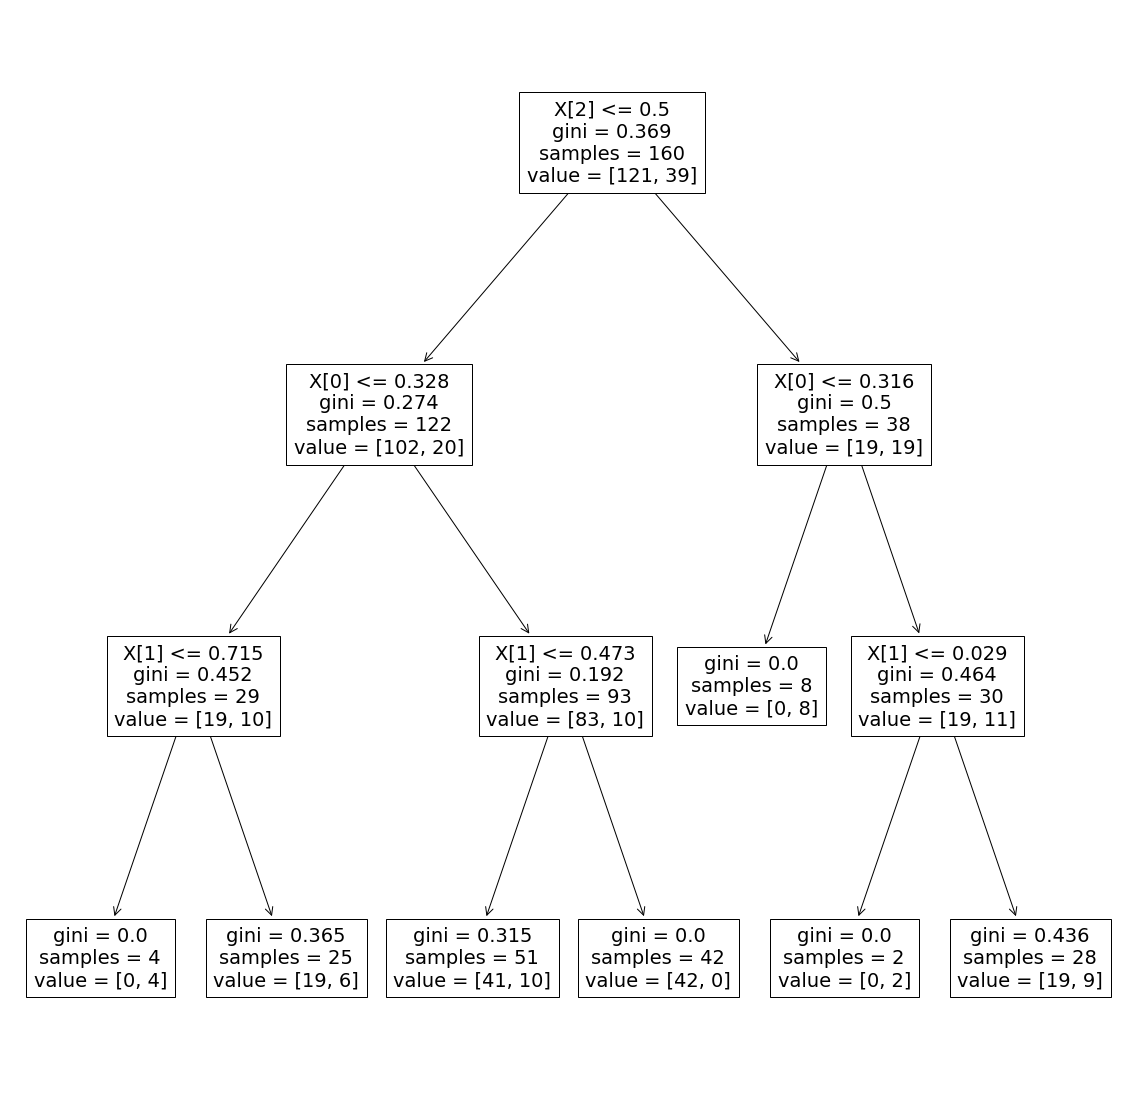

In [25]:
# split into train and test in a stratified manner
uluru_train, uluru_test, uluru_labels_train, uluru_labels_test = train_test_split(uluru_features,uluru_actual,test_size = 0.33)

# scale the train and test datasets
uluru_scaler = MinMaxScaler().fit(uluru_train)
uluru_train = uluru_scaler.transform(uluru_train)
uluru_test = uluru_scaler.transform(uluru_test)

# apply DecisionTreeClassifier on the dataset
# in this case, we're using the gini index to split the data
# We only have 3 attributes, therefore, the max-depth of the decision tree should be 3
uluru_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth = 3)
# now, train the model
uluru_decision_tree.fit(X=uluru_train, y=uluru_labels_train)
# predict on the test set
uluru_predictions = uluru_decision_tree.predict(X=uluru_test)

# evaluate your model and print the accuracy 
uluru_evaluations = evaluation_measures(y_true=uluru_labels_test, y_pred=uluru_predictions)

# print the evaluation of the model
print(f'Accuracy of your model is {uluru_evaluations[0]},\
\nConfusion matrix is:\n {uluru_evaluations[1]}')

# print the tree itself, using the sklearn.tree.plot_tree function
plt.figure(figsize=(20,20))
plot_tree(uluru_decision_tree)

Accuracy of your model is 0.7215189873417721,
Confusion matrix is:
 [[54  3]
 [19  3]]


[Text(558.0, 951.3000000000001, 'X[0] <= 0.461\ngini = 0.356\nsamples = 160\nvalue = [123, 37]'),
 Text(279.0, 679.5, 'X[1] <= 0.66\ngini = 0.499\nsamples = 40\nvalue = [19, 21]'),
 Text(139.5, 407.70000000000005, 'X[1] <= 0.454\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(69.75, 135.89999999999998, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(418.5, 407.70000000000005, 'X[0] <= 0.333\ngini = 0.444\nsamples = 27\nvalue = [18, 9]'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(488.25, 135.89999999999998, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(837.0, 679.5, 'X[2] <= 0.5\ngini = 0.231\nsamples = 120\nvalue = [104, 16]'),
 Text(697.5, 407.70000000000005, 'X[1] <= 0.151\ngini = 0.147\nsamples = 100\nvalue = [92, 8]'),
 Text(627.75, 135.89999999999998, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(767.25, 135.89999999999998, 'gini = 0.104\n

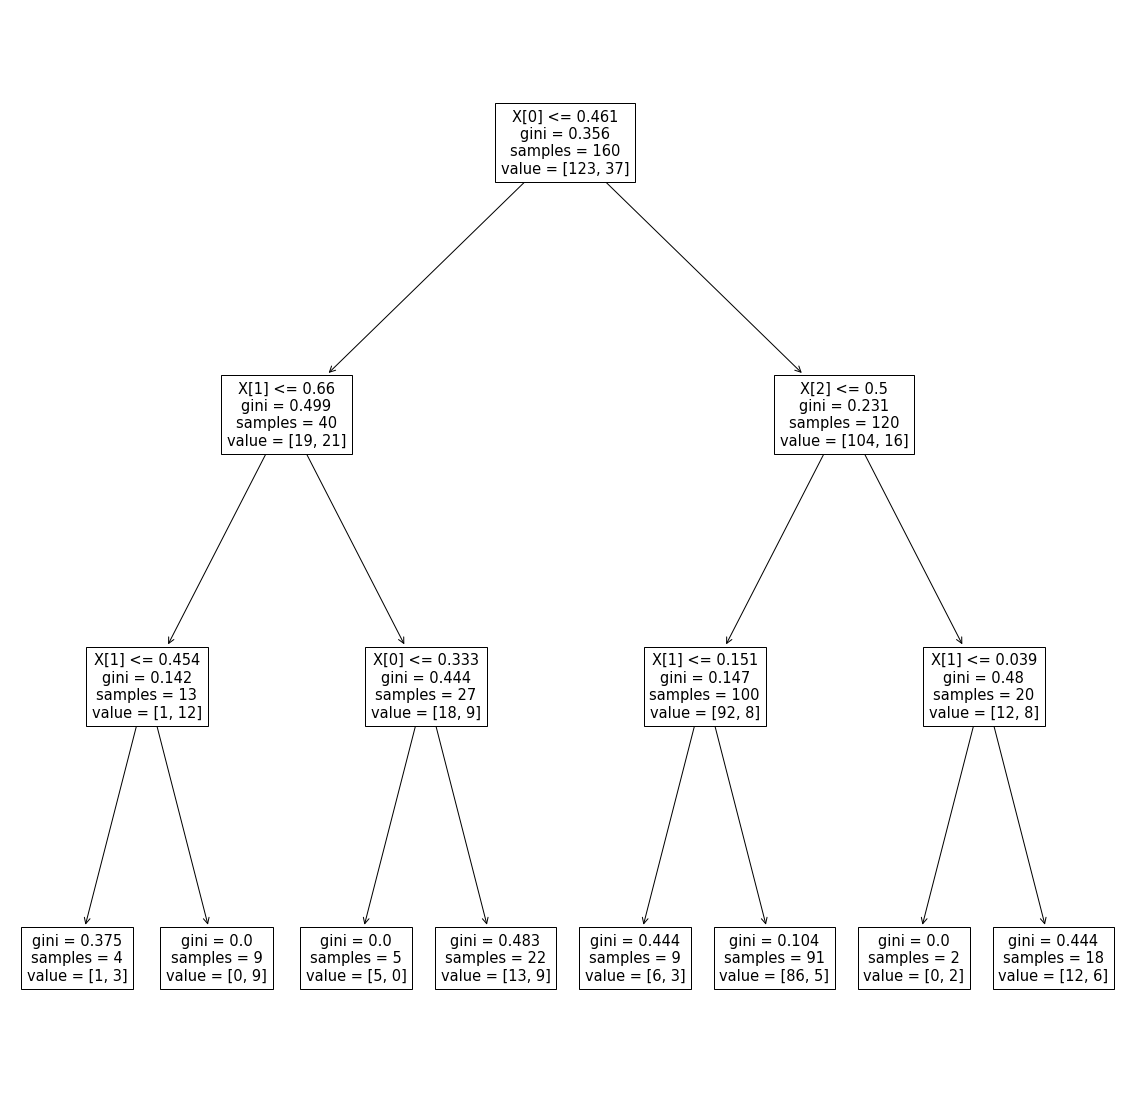

In [26]:
brisbane_train, brisbane_test, brisbane_labels_train, brisbane_labels_test = train_test_split(brisbane_features,brisbane_actual,test_size = 0.33)


brisbane_scaler = MinMaxScaler().fit(brisbane_train)
brisbane_train = brisbane_scaler.transform(brisbane_train)
brisbane_test = brisbane_scaler.transform(brisbane_test)

brisbane_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth = 3)
brisbane_decision_tree.fit(X=brisbane_train, y=brisbane_labels_train)
brisbane_predictions = brisbane_decision_tree.predict(X=brisbane_test)
brisbane_evaluations = evaluation_measures(y_true=brisbane_labels_test, y_pred=brisbane_predictions)
print(f'Accuracy of your model is {brisbane_evaluations[0]},\
\nConfusion matrix is:\n {brisbane_evaluations[1]}')
plt.figure(figsize=(20,20))
plot_tree(brisbane_decision_tree)

Accuracy of your model is 0.7088607594936709,
Confusion matrix is:
 [[52  7]
 [16  4]]


[Text(558.0, 951.3000000000001, 'X[0] <= 0.311\ngini = 0.369\nsamples = 160\nvalue = [121, 39]'),
 Text(279.0, 679.5, 'X[1] <= 0.76\ngini = 0.491\nsamples = 37\nvalue = [16, 21]'),
 Text(139.5, 407.70000000000005, 'X[1] <= 0.529\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(69.75, 135.89999999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(418.5, 407.70000000000005, 'X[1] <= 0.826\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(488.25, 135.89999999999998, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(837.0, 679.5, 'X[1] <= 0.296\ngini = 0.25\nsamples = 123\nvalue = [105, 18]'),
 Text(697.5, 407.70000000000005, 'X[1] <= 0.216\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(627.75, 135.89999999999998, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(767.25, 135.89999999999998, 'gini = 0.408\nsa

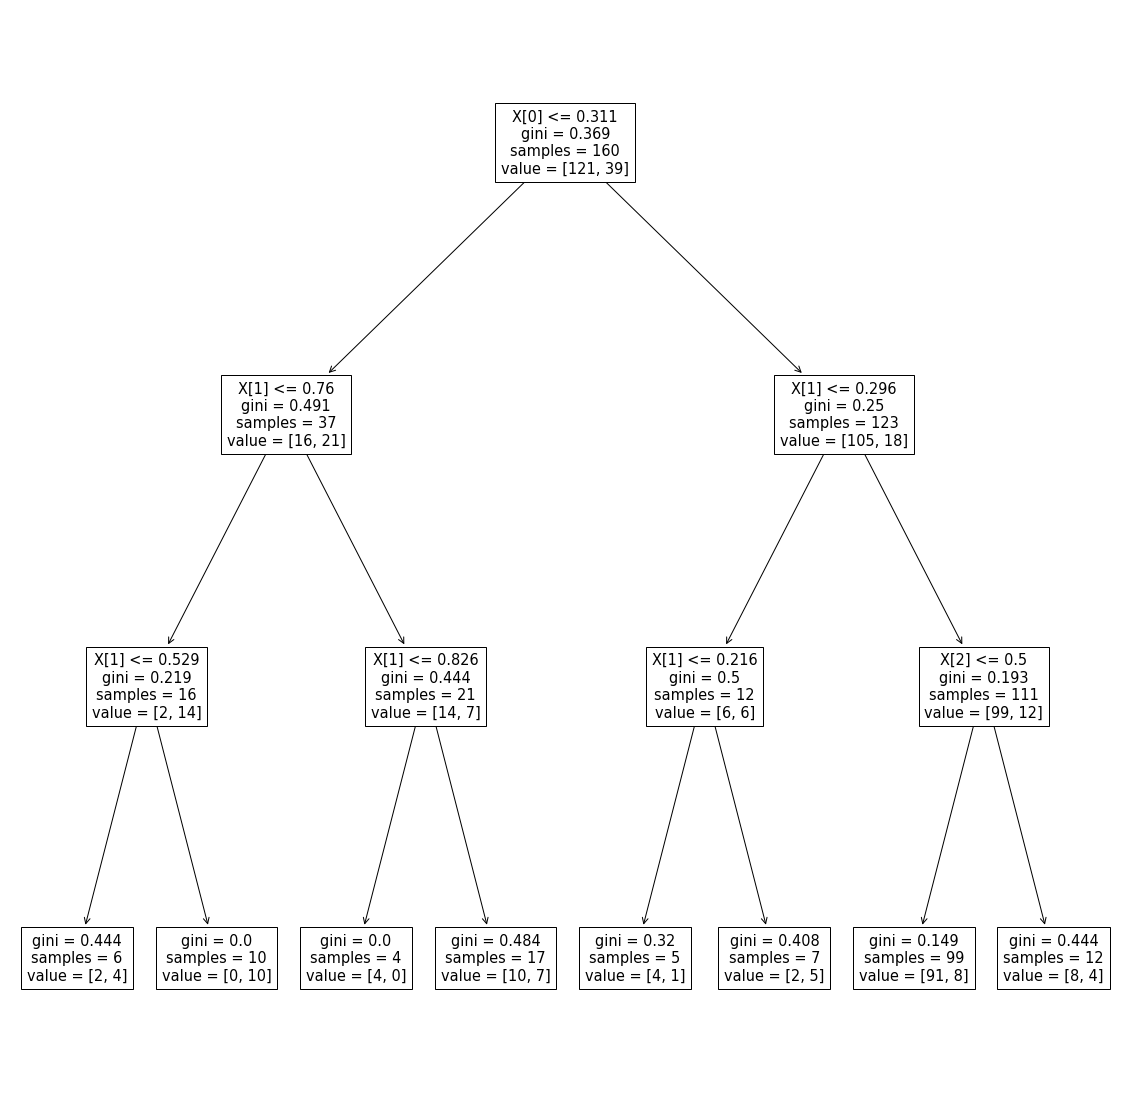

In [27]:
norfolk_train, norfolk_test, norfolk_labels_train, norfolk_labels_test = train_test_split(norfolk_features,norfolk_actual,test_size = 0.33)


norfolk_scaler = MinMaxScaler().fit(norfolk_train)
norfolk_train = norfolk_scaler.transform(norfolk_train)
norfolk_test = norfolk_scaler.transform(norfolk_test)

norfolk_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth = 3)
norfolk_decision_tree.fit(X=norfolk_train, y=norfolk_labels_train)
norfolk_predictions = norfolk_decision_tree.predict(X=norfolk_test)
norfolk_evaluations = evaluation_measures(y_true=norfolk_labels_test, y_pred=norfolk_predictions)
print(f'Accuracy of your model is {norfolk_evaluations[0]},\
\nConfusion matrix is:\n {norfolk_evaluations[1]}')
plt.figure(figsize=(20,20))
plot_tree(norfolk_decision_tree)

In [28]:
decision_tree_average = (norfolk_evaluations[0]+brisbane_evaluations[0]+uluru_evaluations[0])/3
print(f'In conclusion, the overall accuracy of using a decision tree model is {decision_tree_average}')

In conclusion, the overall accuracy of using a decision tree model is 0.7341772151898734


In [29]:
# Now, let's try with K-NN approaching
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(uluru_train,uluru_labels_train)
Y_pred2=knn.predict(uluru_test)
uluru_accuracy = accuracy_score(uluru_labels_test,Y_pred2)
uluru_accuracy

/opt/tljh/user/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7721518987341772

In [30]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(brisbane_train,brisbane_labels_train)
Y_pred2=knn.predict(brisbane_test)
brisbane_accuracy = accuracy_score(brisbane_labels_test,Y_pred2)
brisbane_accuracy

/opt/tljh/user/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7341772151898734

In [31]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(norfolk_train,norfolk_labels_train)
Y_pred2=knn.predict(norfolk_test)
norfolk_accuracy = accuracy_score(norfolk_labels_test,Y_pred2)
norfolk_accuracy

/opt/tljh/user/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7468354430379747

In [32]:
average = (uluru_accuracy+brisbane_accuracy+norfolk_accuracy)/3
print(f'In conclusion, the overall accuracy of using a KNN model is {average}')

In conclusion, the overall accuracy of using a KNN model is 0.7510548523206751
